In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.expand_frame_repr = False

In [0]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [0]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [0]:
train_df['Sex'] = train_df['Sex'] == 'male'
test_df['Sex'] = test_df['Sex'] == 'male'
y = train_df['Survived'].values
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch', 'Sex']
x = train_df[features].values
test_x = test_df[features].values

In [0]:
my_imputer = SimpleImputer()
x = my_imputer.fit_transform(x)
test_x = my_imputer.transform(test_x)

In [35]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')
data1 = data_raw.copy(deep = True)#.drop(['Survived'], 1)
data_cleaner = [data1, data_val]
data_cleaner

[     PassengerId  Survived  Pclass                                               Name     Sex    ...     Parch            Ticket     Fare Cabin  Embarked
 0              1         0       3                            Braund, Mr. Owen Harris    male    ...         0         A/5 21171   7.2500   NaN         S
 1              2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    ...         0          PC 17599  71.2833   C85         C
 2              3         1       3                             Heikkinen, Miss. Laina  female    ...         0  STON/O2. 3101282   7.9250   NaN         S
 3              4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    ...         0            113803  53.1000  C123         S
 4              5         0       3                           Allen, Mr. William Henry    male    ...         0            373450   8.0500   NaN         S
 ..           ...       ...     ...                                   

In [0]:
for dataset in data_cleaner:
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [0]:
data1.drop(['PassengerId','Cabin', 'Ticket'], axis=1, inplace = True)

In [38]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
data_cleaner

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[     Survived  Pclass                                               Name     Sex   Age      ...       FamilySize  IsAlone  Title          FareBin        AgeBin
 0           0       3                            Braund, Mr. Owen Harris    male  22.0      ...                2        0     Mr   (-0.001, 7.91]  (16.0, 32.0]
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      ...                2        0    Mrs  (31.0, 512.329]  (32.0, 48.0]
 2           1       3                             Heikkinen, Miss. Laina  female  26.0      ...                1        1   Miss   (7.91, 14.454]  (16.0, 32.0]
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      ...                2        0    Mrs  (31.0, 512.329]  (32.0, 48.0]
 4           0       3                           Allen, Mr. William Henry    male  35.0      ...                1        1     Mr   (7.91, 14.454]  (32.0, 48.0]
 ..        ...     ...            

In [39]:
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
data1

,Survived,Pclass,Name,Sex,Age,...,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,...,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,...,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,...,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,...,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,...,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,...,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,...,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,...,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,...,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


In [40]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
data_cleaner

[     Survived  Pclass                                               Name     Sex   Age      ...       Sex_Code  Embarked_Code  Title_Code AgeBin_Code  FareBin_Code
 0           0       3                            Braund, Mr. Owen Harris    male  22.0      ...              1              2           3           1             0
 1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      ...              0              0           4           2             3
 2           1       3                             Heikkinen, Miss. Laina  female  26.0      ...              0              2           2           1             1
 3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      ...              0              2           4           2             3
 4           0       3                           Allen, Mr. William Henry    male  35.0      ...              1              2           3           2             1
 ..       

In [0]:
Target = ['Survived']

data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data1_xy =  Target + data1_x

data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin

In [42]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
#features = ['Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Sex_Code', 'Embarked_Code', 'Title_Code', 'AgeBin_Code', 'FareBin_Code',]
#x = data1[features]
#y = data1['Survived']
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,...,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,...,0,0,0,1,0
1,1,1,0,38.0,71.2833,...,0,0,0,0,1
2,3,0,0,26.0,7.9250,...,0,0,1,0,0
3,1,1,0,35.0,53.1000,...,0,0,0,0,1
4,3,0,0,35.0,8.0500,...,0,0,0,1,0


In [0]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

In [0]:
MLA = [
    #Ensemble Methods
    #ensemble.AdaBoostClassifier(),
    #ensemble.BaggingClassifier(),
    #ensemble.ExtraTreesClassifier(),
    #ensemble.GradientBoostingClassifier(),
    #ensemble.RandomForestClassifier(),

    #Gaussian Processes
    #gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    #linear_model.LogisticRegressionCV(),
    #linear_model.PassiveAggressiveClassifier(),
    #linear_model.RidgeClassifierCV(),
    #linear_model.SGDClassifier(),
    #linear_model.Perceptron(),
    
    #Navies Bayes
    #naive_bayes.BernoulliNB(),
    #naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    #neighbors.KNeighborsClassifier(),
    
    #SVM
    #svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    #svm.LinearSVC(),
    
    #Trees    
    #tree.DecisionTreeClassifier(),
    #tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    #discriminant_analysis.LinearDiscriminantAnalysis(),
    #discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]

In [0]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]
data1[data1_x_bin]

In [64]:
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    output = pd.DataFrame({'PassengerId': data_val.PassengerId,
                       'Survived': MLA_predict[MLA_name]})
    output.to_csv('submission_v4.csv', index=False)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0234039


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'Algorithm')

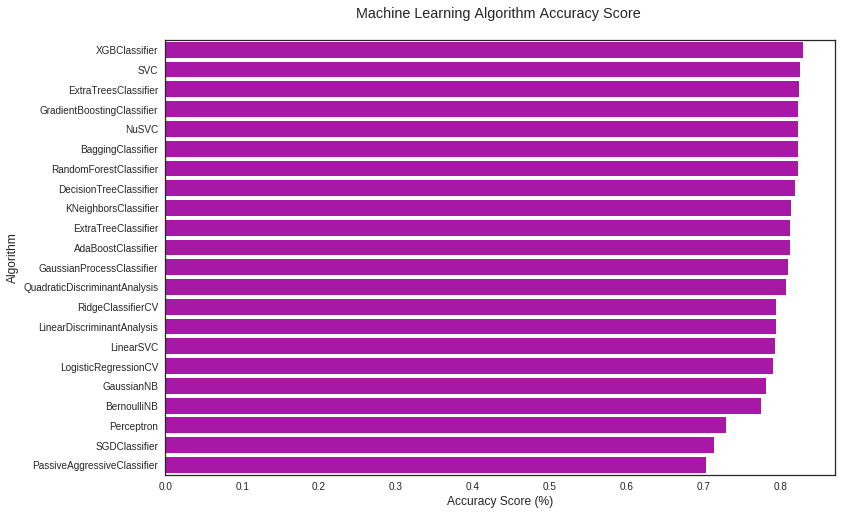

In [51]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [0]:
rf = RandomForestClassifier(n_estimators=850, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, x, y, scoring='accuracy', cv=kfold, n_jobs=2)
round(scores.mean(), 3)

0.806

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, x, y, scoring='accuracy', cv=kfold, n_jobs=2)
round(scores.mean(), 3)

0.75

In [0]:
tree = DecisionTreeClassifier(max_leaf_nodes=45, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(tree, x, y, scoring='accuracy', cv=kfold, n_jobs=2)
round(scores.mean(), 3)

0.825

In [0]:
svc = SVC(kernel='linear', C=10, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc, x, y, scoring='accuracy', cv=kfold, n_jobs=2)
round(scores.mean(), 3)

0.794

In [0]:
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.02, random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, x, y, scoring='accuracy', cv=kfold, n_jobs=2)
round(scores.mean(), 3)

0.829

In [0]:
model = DecisionTreeClassifier(max_leaf_nodes=45, random_state=42)
model.fit(x, y)
predictions = model.predict(test_x)

In [0]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.02, random_state=42)
model.fit(x, y)
predictions = model.predict(test_x)

In [0]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId,
                       'Survived': predictions})
output.to_csv('submission_v3.csv', index=False)